# Bay Wheels's trip Dataset Exploration
## by Chrysanthi Polyzoni

## Investigation Overview

> We are willing to make some analysis on Bay Wheels's trip Dataset

## Dataset Overview

> The Dataset consists data from the year 2019.

In [9]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [7]:
# load in the dataset into a pandas dataframe
df_rides = pd.read_csv('baywheel.csv', index_col = False)


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## User Types in our DataSet

> Costumers Versus Subscriber User Type

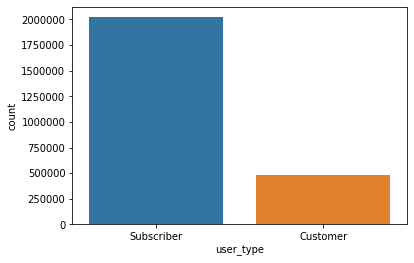

In [10]:
sns.countplot(data = df_rides, x='user_type');

## Distribution of the rides during 24 Hours

> Let's have a look of the distribution of the rides during the day. Both Subscribers and Costumers

In [15]:
#parse dates
df_rides['start_time'] = pd.to_datetime(df_rides.start_time)
df_rides['end_time'] = pd.to_datetime(df_rides.end_time)

In [16]:
df_rides['start_year'] = df_rides.start_time.dt.year
df_rides['start_month'] = df_rides.start_time.dt.month
df_rides['start_hour'] = df_rides.start_time.dt.hour

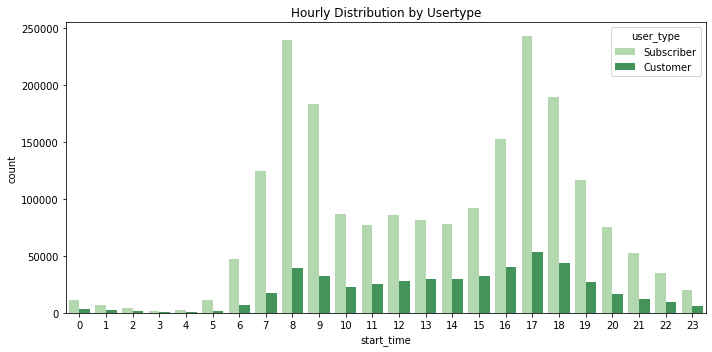

In [17]:
plt.figure(figsize=(10,5))
sns.countplot(data = df_rides, x = df_rides.start_time.dt.hour, hue = 'user_type', palette = 'Greens')
plt.title('Hourly Distribution by Usertype')
plt.tight_layout();

## Ride Duration per month



In [32]:
df_time_s = df_rides.sample(2000)
df_time_s['duration_min'] = df_time_s['duration_sec']//60

In [35]:
df_time_s.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2000 entries, 119922 to 2370520
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   duration_sec             2000 non-null   int64         
 1   start_time               2000 non-null   datetime64[ns]
 2   end_time                 2000 non-null   datetime64[ns]
 3   start_station_id         2000 non-null   object        
 4   start_station_name       2000 non-null   object        
 5   start_station_latitude   2000 non-null   float64       
 6   start_station_longitude  2000 non-null   float64       
 7   end_station_id           2000 non-null   object        
 8   end_station_name         2000 non-null   object        
 9   end_station_latitude     2000 non-null   float64       
 10  end_station_longitude    2000 non-null   float64       
 11  bike_id                  2000 non-null   int64         
 12  user_type                2

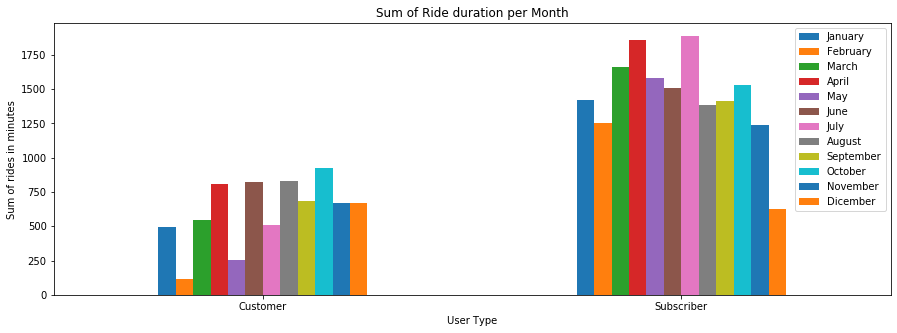

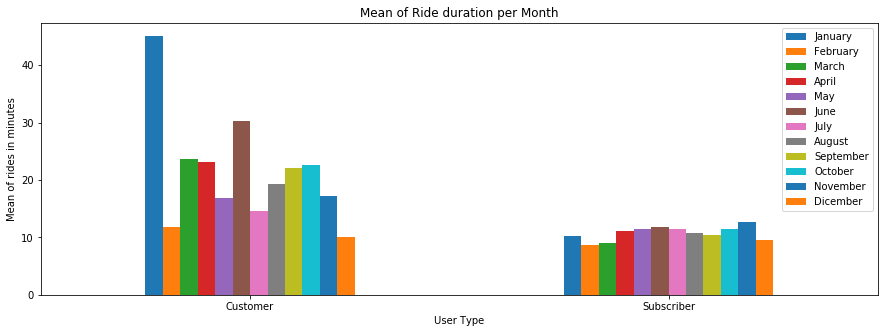

In [36]:

pivot_sum = df_time_s.pivot_table(index = 'user_type', columns = 'start_month', values = 'duration_min', aggfunc = np.sum, fill_value = 0)
pivot_sum = pivot_sum.rename(columns = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October',11:'November', 12:'Dicember'})

pivot_mean = df_time_s.pivot_table(index = 'user_type', columns = 'start_month', values = 'duration_min', aggfunc = np.mean, fill_value = 0)
pivot_mean = round(pivot_mean, 2)
pivot_mean = pivot_mean.rename(columns = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'September', 10:'October',11:'November', 12:'Dicember'})
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'Dicember']

pivot_sum.plot(kind = 'bar', figsize = (15, 5), title = "Sum of Ride duration per Month", rot = 0)
plt.legend(months)
plt.ylabel('Sum of rides in minutes')
plt.xlabel('User Type')
pivot_mean.plot(kind = 'bar', figsize=(15, 5), title = "Mean of Ride duration per Month", rot = 0)
plt.legend(months)
plt.xlabel('User Type')
plt.ylabel('Mean of rides in minutes');

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!